In [1]:
import os
from os.path import join
from collections import Counter
import re
from nltk import sent_tokenize, word_tokenize
from tdmh import *
import pandas as pd
from sklearn.metrics.pairwise import cosine_distances , euclidean_distances
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

ana = SentimentIntensityAnalyzer()

import ssl

try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    pass
else:
    ssl._create_default_https_context = _create_unverified_https_context

## Collect all the titles

Firstly, we collect all the titles of the files in the corpus. The texts in the corpus are saved in a list named `corpus`. 

In [2]:
texts = ['Emma', 
         'Northanger_Abbey',
         'Persuasion',
         'Mansfield_Park',
         'Pride_and_Prejudice',
         'Sense_and_Sensibility']

pos_tags = ['JJ','JJR','JJS','VBD','MD','RB','RBR','RBS']
ttr_cap = 3000

In [3]:
out = open( 'data.csv' , 'w' , encoding = 'utf-8' )

## Header of the CSV file
out.write('title,tokens,sentences,ttr,sentiment')

for t in pos_tags:
    out.write(f',{t}')


out.write('\n')


all_categories = Counter()
tokens_novels = dict()

for text in texts:
    print(text)
    data = dict()

    tokens = pd.read_csv( join('Data',f'{text.lower()}.tokens') , sep = '\t')
    data['nr_tokens'] = tokens['token_ID_within_document'].iloc[-1]
    data['nr_sentences'] = tokens['sentence_ID'].iloc[-1]
    pos_data = Counter(tokens['fine_POS_tag'])
    
    data['ttr'] = len(tokens.iloc[:ttr_cap]['word'].unique())/ttr_cap
    
    all_scores = []
    sentence_id = -1
    sentence = ''
    for i,row in tokens.iterrows():
        if row['sentence_ID'] != sentence_id:
            
            scores = ana.polarity_scores(sentence)
            all_scores.append( scores["compound"] )
            
            sentence = ''
            sentence_id = row['sentence_ID'] 
        sentence += row['word'].strip() + ' '
        
    data['sentiment'] = sum(all_scores) / len(all_scores)


    
    # write the results to a CSV file    
    out.write( f"{text},{data['nr_tokens']},{data['nr_sentences']},{data['ttr']},{data['sentiment']}" )
    for t in pos_tags:
        out.write( f",{pos_data[t] }"  )
    out.write('\n')

out.close()

Emma


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3441: DtypeWarning: Columns (7,11) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


Northanger_Abbey
Persuasion
Mansfield_Park
Pride_and_Prejudice
Sense_and_Sensibility


## Read the data from the CSV

Once the CSV file containing all the data has been created, we can start the analyses. The data is firstly read using the `read_csv()` method from `pandas`. 

In [4]:
data = pd.read_csv('data.csv')
data['title']

0                     Emma
1         Northanger_Abbey
2               Persuasion
3           Mansfield_Park
4      Pride_and_Prejudice
5    Sense_and_Sensibility
Name: title, dtype: object

## Visualisations

In many of the visualisations below, the colours represent the different values for a categorical variable in the CSV file named 'metdata.csv'. 
In the cell below, specify the column containing the values that need to be visualised. 


### Average sentence length

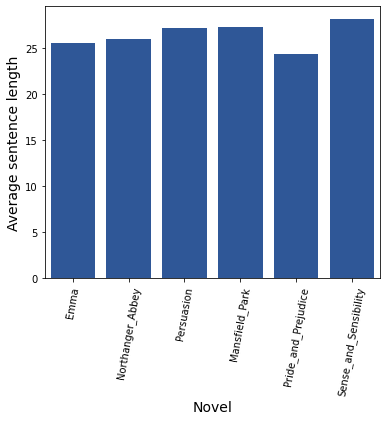

In [5]:
data['sentence_length'] = data['tokens'] / data['sentences']

x_axis = 'title'
y_axis = 'sentence_length'



fig = plt.figure( figsize=( 6 , 5 ) )


graph = sns.barplot( data = data, x=x_axis, y=y_axis, color = '#1e53a8' , dodge=False )

#graph.set_title('' , size = 20) 
graph.set_xlabel('Novel' , size = 14) 
graph.set_ylabel('Average sentence length' , size = 14 )

plt.xticks(rotation= 80)
# The next line places the legend outside out the plot


plt.show()

### Type-token ratio

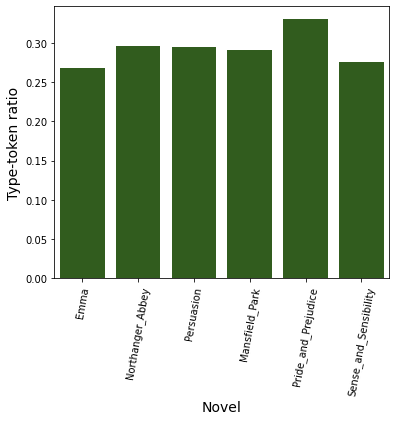

In [6]:
x_axis = 'title'
y_axis = 'ttr'

fig = plt.figure( figsize=( 6 , 5 ) )

graph = sns.barplot( data=data, x=x_axis, y=y_axis, color = '#2d6614', dodge=False )

#graph.set_title('' , size = 20) 
graph.set_xlabel('Novel' , size = 14) 
graph.set_ylabel('Type-token ratio' , size = 14 )

plt.xticks(rotation= 80)
# The next line places the legend outside out the plot


plt.show()

### Modal verbs

Can you add code to do a comparative analysis of the use of modal verbs? The POS code for modal verbs is 'MD'

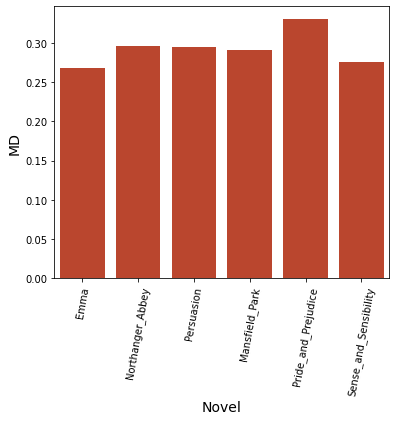

In [7]:
x_axis = 'title'
y_axis = 'ttr'

fig = plt.figure( figsize=( 6 , 5 ) )

graph = sns.barplot( data=data, x=x_axis, y=y_axis, color = '#d13617', dodge=False )

#graph.set_title('' , size = 20) 
graph.set_xlabel('Novel' , size = 14) 
graph.set_ylabel('MD' , size = 14 )

plt.xticks(rotation= 80)
# The next line places the legend outside out the plot


plt.show()

### Adjectives and Adverbs

Text(0, 0.5, 'adjectives')

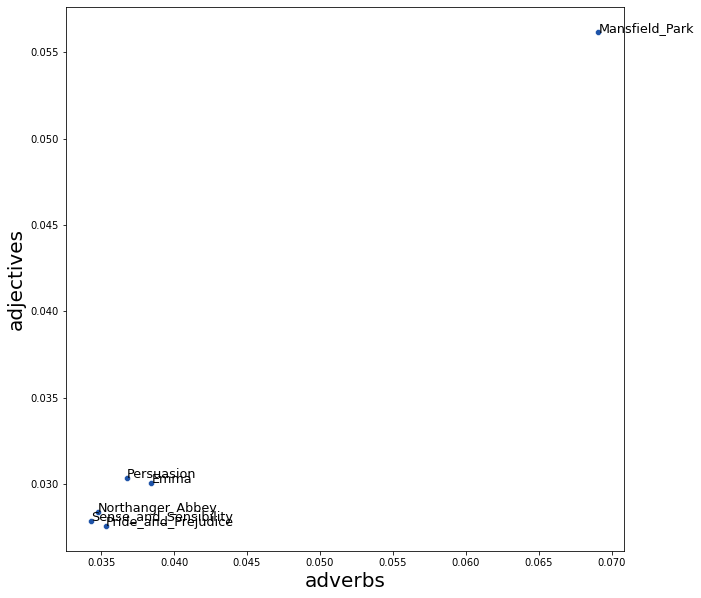

In [8]:
data['adjectives'] = data['JJ'] + data['JJS'] + data['JJS']
data['adverbs'] = data['RB'] + data['RBR'] + data['RBS'] 
data['adjectives'] = data['adjectives'] / data['tokens']
data['adverbs'] = data['adverbs'] / data['tokens']

# Columns to use in the visualisation
y_axis = 'adjectives'
x_axis = 'adverbs'


fig = plt.figure( figsize = ( 10,10 ))



ax = sns.scatterplot( data=data , x=x_axis, y=y_axis,  
                     color = '#1e53a8'  )

for index, row in data.iterrows():
    plt.text( row[x_axis], row[y_axis] , row['title'] , fontsize=12.8)


ax.set_xlabel( x_axis  , fontsize = 20 )
ax.set_ylabel( y_axis  , fontsize = 20 )

